<div class="alert alert-block" style = "background-color: black">
    <p><b><font size="+4" color="orange">Multiple Linear Regression</font></b></p>
    <p><b><font size="+1" color="white">by Jubril Davies</font></b></p>
    </div>

* **Import Packages**

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split
import scipy
from scipy import linalg
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

**Import Data Visualization packages**

In [18]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
#plt.rcParams.update({'font.size':12}) #sets global font size

---
<div class="alert alert-block" style = "background-color: black">
    <p><b><font size="+3" color="white">Introduction</font></b></p>
    </div>

---

**S**imple Linear regression is useful when predicting a response from one single predictor variable. But in practice,we often have more than one predictor In the case of the advertisement data, we also have data for budget spent advertising on radio and newspapers as well.We may want to know if there's any association between these variables and sales. 

**So how do we extend our analysis to reflect these two additional predictors?**

A way to accomplish this is to extend our simple linear regression model to accommodate multiple predictor variables. We can do this by giving each predictor a slope coefficient in a single model. Given that we have p distinct predictors, the multiple linear regression model takes the form below:

$$
\begin{align}
Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{p}X_{p} + ∊ \\
\end{align}
$$

where $X_{j}$ represents the jth predictor and $\beta_{j}$ quantifies the association between that variable and the response. $\beta_{j}$ is interpreted as the average effect on Y of a one unit increase in $X_{j}$ holding all other predictors fixed. 

In the advertising example,all variables are substituted into the model equation as follows:

$$
\begin{align}
sales = \beta_{0} + \beta_{1}TV + \beta_{2}radio + \beta_{3}newspaper + ∊ \\
\end{align}
$$

---
## **Estimating the Regression Coefficients**
***
We start with unknown values of the regression coefficients $\beta_{0}, \beta_{1},... \beta_{p}$ and proceed to estimate $\hat \beta_{0}, \hat \beta_{1},... \hat \beta_{p}$. We can therefore make predictions from:

$$
\begin{align}
\hat Y = \hat \beta_{0} + \hat \beta_{1}X_{1} + \hat \beta_{2}X_{2} + ... + \hat \beta_{p}X_{p} \\
\end{align}
$$



These model parameters are estimated using the same least squares approach in simple linear regression. We choose the best values of $\hat \beta_{0}, \hat \beta_{1},... \hat \beta_{p}$ that minimize the sum of squared residuals, RSS.

$$
\begin{align}
RSS = ∑_{i=1}^{n}\left(y_{i} - \hat y{i}\right)^{2}\\
\end{align}
$$

---
<div class="alert alert-block" style = "background-color: black">
    <p><b><font size="+2" color="orange">Test 1 - Perform the Multiple Linear Regression Modeling using the 3 variables - TV, Radio & Newspaper</font></b></p>
    </div>

---
**First, load the advertisement data**

In [7]:
Advert = pd.read_csv("../../../Data/ISLP_Data/Advertising.csv")
Advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


* Obtain your dependent,Y and Independent Variables X from the Advert dataframe

In [8]:
X = pd.DataFrame({'TV':Advert['TV'],'Radio':Advert['radio'],'Newspaper':Advert['newspaper']})
Y = Advert.sales

* Use statsmodels to perform the multiple linear regression

In [9]:
X = sm.add_constant(X)
MLR_model = sm.OLS(Y,X).fit()
predicted_response_Yhat = MLR_model.predict(X)
summarize(MLR_model)

,coef,std err,t,P>|t|
const,2.9389,0.312,9.422,0.00
TV,0.0458,0.001,32.809,0.00
Radio,0.1885,0.009,21.893,0.00
Newspaper,-0.0010,0.006,-0.177,0.86


So according to our linear regression model formulation for this problem above, the coefficients $\beta_{1}, \beta_{2}, \beta_{3}$ obtained above represent that of the TV, Radio and Newspaper respectively and the fitted regression model is thus:

$$
\begin{align}
sales = 2.94 + 0.0458TV + 0.1885radio - 0.001newspaper + ∊ \\
\end{align}
$$


## **Interpretation**

The intercept value, $\beta_{0}$ is 2.94. This is the estimated average value of our dependent or response variable when all of our independent or predictor variables are set to zero.In the case of this sales and advert media budget, this implies that if we did not spend any amount on TV, radio or newspaper adverts, we will make a sales of 2.94.

For the coefficients, we have **3** coefficients for the TV, Radio and Newspaper adverts respectively. These values represent the `quality of relation of our independent variables to the dependent variable`. Radio has the highest value of **0.1885** implying that the advert spent on radio advertisement contributes the **highest** volume to overall sales while Newspaper with a coefficient value of **0.001** contributes the **least** to sales. 

* Display full Linear Regression Model results 

In [10]:
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.58e-96
Time:                        11:15:56   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

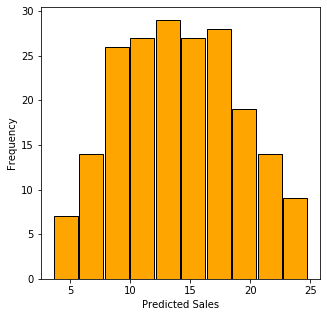

In [11]:
ax = predicted_response_Yhat.plot.hist(figsize=(5,5),edgecolor="black",color="orange",rwidth=0.95)
ax.set_xlabel('Predicted Sales');

* Visualize the Regression between the dependent and Independent Variables

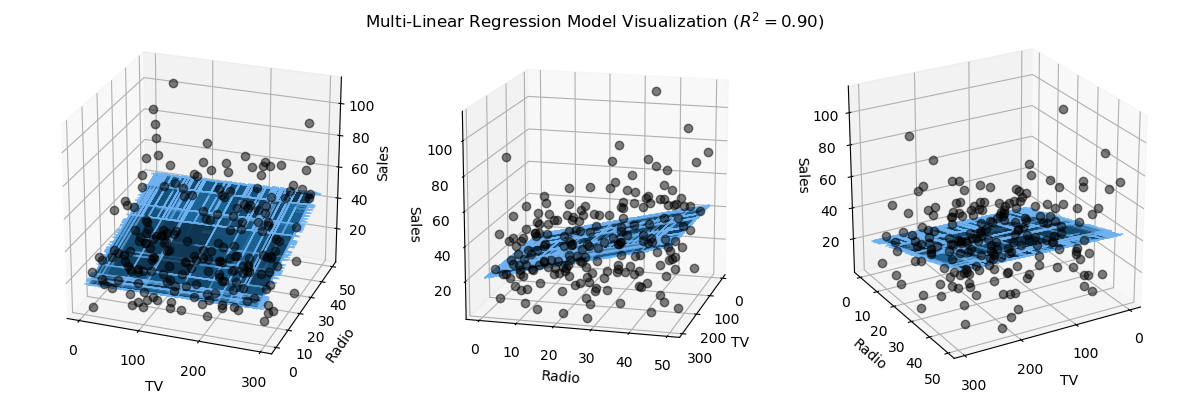

In [12]:
%matplotlib inline
import IPython

plt.style.use('default')
#plt.style.use('ggplot')

# Create the plot
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131,projection='3d')
ax2 = fig.add_subplot(132,projection='3d')
ax3 = fig.add_subplot(133,projection='3d')

axes = [ax1, ax2, ax3]
x = X.TV; y = X.Radio; z = X.Newspaper;

# Create a meshgrid for the plane using TV and Radio adverts while dropping Newspaper
x_plane,y_plane = np.meshgrid(x,y)

# Fit a plane using linear algebra least squares
A = np.vstack([x,y,np.ones_like(x)]).T
plane_coef,_,_,_ = np.linalg.lstsq(A,z,rcond=None)
z_plane = plane_coef[0]*x_plane + plane_coef[1]*y_plane + plane_coef[2]

for ax in axes:
    ax.plot(x,y,z,color='k',zorder=15,linestyle='none',marker='o',alpha=0.5)
    # Create a scatter plot of the independent variables - TV, Radio and Newspaper Advert budgets
    #ax.scatter(x_plane,y_plane,z_plane,facecolor=(0,0,0,0),s=20,edgecolor='#70b3f0');
    ax.plot_surface(x_plane,y_plane,z_plane,alpha=0.5,facecolor=(0,0,0,0),edgecolor='#70b3f0')
    ax.set_xlabel('TV')
    ax.set_ylabel('Radio')
    ax.set_zlabel('Sales')
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    

ax1.view_init(elev=25, azim=-70)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % MLR_model.rsquared, color='k')
fig.tight_layout()

---
<div class="alert alert-block" style = "background-color: black">
    <p><b><font size="+2" color="orange">Test 2 - Perform Multiple Linear Regression using only 2 variables - TV & Radio</font></b></p>
    </div>
    
---

In [13]:
X1 = pd.DataFrame({'TV':Advert['TV'],'Radio':Advert['radio']})
Y1 = Advert.sales

* Use the statsmodel library to perform the linear regression

In [14]:
X1 = sm.add_constant(X1)
MLR_TVRadiomodel = sm.OLS(Y1,X1).fit()
predicted_TVRadioModel_Yhat = MLR_TVRadiomodel.predict(X1)
MLR_TVRadiomodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           4.83e-98
Time:                        11:16:03   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

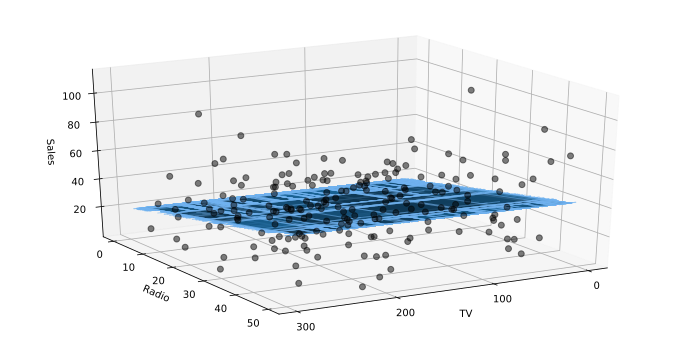

In [19]:
#Plot a single view and rotate 360 degrees
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111,projection='3d')
ax.plot(x,y,z,color='k',zorder=15,linestyle='none',marker='o',alpha=0.5)
ax.plot_surface(x_plane,y_plane,z_plane,alpha=0.5,facecolor=(0,0,0,0),edgecolor='#70b3f0')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.locator_params(nbins=4, axis='x')
ax.locator_params(nbins=5, axis='x')
ax.view_init(elev=25, azim=-70)
plt.savefig('02_MLR_model1.png')
ax.view_init(elev=15, azim=15)
plt.savefig('02_MLR_model2.png')
ax.view_init(elev=25, azim=60)
plt.savefig('02_MLR_model3.png')

---
<div class="alert alert-block" style = "background-color: black">
    <p><b><font size="+2" color="orange">Test 3 - Perform Linear Regression using only TV</font></b></p>
    </div>
    
---

In [16]:
X2 = pd.DataFrame({'TV':Advert['TV']})
Y2 = Advert.sales

* Use the statsmodel library to perform the linear regression

In [17]:
X2 = sm.add_constant(X2)
MLR_TV_model = sm.OLS(Y2,X2).fit()
predicted_TV_Model_Yhat = MLR_TV_model.predict(X2)
MLR_TV_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.47e-42
Time:                        11:16:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
<div class="alert alert-block" style= "background-color: black">
    <p><b><font size="+2" color="white">Important Questions when performing Multiple Linear Regression</font></b></p>
    </div>
    
---

* **Is at least one of the predictors $X_{1}, X_{2},...,X_{p}$ useful in predicting the response?**

* **Do all the predictors help to explain the response, Y or is only a subset of the predictors useful?**

* **How well does the model fit the data?**

* **Given a set of predictor values, what response value should we predict, and how accurate is our prediction?**

## **1. Is there a relationship between Response and the Predictors?**

In simple linear regression, to determine whether there's a relationship between a response and predictor, we simply just check the null hypothesis i.e whether $\beta_{1} = 0$.

In Multiple Linear Regression, with p predictors, we need to ask whether all of the regression coefficients are zero.i.e whether $\beta_{1} = \beta_{2} = ... = \beta_{p} = 0$.

To answer this question, we use a simple hypothesis - We simply test the null hypothesis:

$$
\begin{align}
H_{0}: \beta_{1} = \beta_{2} = ... = \beta_{p} = 0\\
\end{align}
$$

versus the alternative

$$
\begin{align}
H_{a}: \text{at least one }\beta_{j} ≠ 0\\
\end{align}
$$

This hypothesis test is performed by computing the F-statistic

* **When there is no relationship between the response and predictors, one would expect the F-statistic to take on a value close to 1**

* **On the other hand, if the alternative hypothesis is true, that is theres a relationship between the response and predictors i.e $H_{a}$ is true, we expect F to be greater than 1**

**How large does the F-statistic need to be before we can reject $H_{0}$ and conclude that there is a relationship between the response and the predictors?** 

**Answer**

The answer depends on the values of the number of observations,n, and number of predictor variables,p.

* When n is large, an F-statistic that is just a little greater than 1 might still provide evidence against $H_{0}$ 

* On the other hand, if n is small, a larger F-statistic than 1 is needed to reject the null hypothesis that a relationship exists between the response and the predictors.



## **Analysis**

From the full Multiple linear regression model results obtained above, it can be seen that the F-statistic has a value of <b>570.3</b> which is <b>>></b> 1. This suggests that there is a relationship between the response and the predictors .i.e a relationship exists between the sales generated and the amount spent on TV, Radio and Newspaper adverts. The alternative hypothesis is true.

The number of observations,**n**, is 200 while the number of predictors,**p**, is 3. This case portends a situation where the number of observations is reasonably small. As such, a large F-statistic as the one obtained in this case is needed to reject the null hypothesis.

### **Using the t-test and p values as a diagnostic for existence of a relationship**

There's a caveat of using the individual t-test statistics and associated p-values to decide whether or not there is any association between the variables and the response, there is a very high chance that we will incorectly conclude that there is a relationship. However, **the F-statistics does not suffer from this problem because it adjusts for the number of predictors**.

The idea of using an F-statistic to test for any association between the predictors and the response works when p is relatively small and certainly small compared to n.

When p is large, this is a high-dimensional problem that can be solved via forward selection or more importantly via linear model selection and regularization methods.

<div class="alert alert-block" style= "background-color: orange; border-color: black">
    <p>&#9672<b><font size="+2" color="black">Section Summary</font></b></p>
    The take home from this section is that the first step in a multiple regression analysis is to compute the F-statistic and examine the associated p-value.
    </div>

***
## **2. How to determine the important Predictor Variables?**

We have been able to establish that the first step in a multiple regression analysis is the computation of the F-statistic and the associated p-value. if we conclude on the basis of that p-value that at least one of the predictors is related to the response, then it is reasonable to want to know the culprits.

It is possible that all of the predictors are associated with the response but in most cases, the response is only associated with a subset of the predictors. The task of determining which subset of predictors are associated with the response so as to be able to fit a single model invloving only those predictors is known as **Variable Selection**.



<div class="alert alert-block" style= "background-color: black">
    <p75><font color="white">&#9673</font><b><font size="+1" color="white">Variable Selection</font></b></p75>
    <p><b><font color="white">This is the process of determining which subset of predictors are associated with the response so as to be a ble to fit a single model involving only those predictors.</font></b></p>
    </div>

To perform variable selection, we could try out different subset of predictors and then select the best model out of the models we have considered. Various statistics can then be used to judge the quality of a model. These include:
  * Mallow's Cp
  * Akaike Information Criterion (AIC)
  * Bayesian Information Criterion (BIC)
  * Adjusted $R^{2}$
  
To determine which model is the best, we require an automated and an efficient approach to choose a smaller subset to consider. There are 3 classical approaches to do this:

  * Forward Selection
  * Backward Selection
  * Mixed Selection

## **1. Forward Selection**
### Basic Steps
  1. We begin with the null model—a model that contains an intercept but no predictors. 
  2. We then fit p simple linear regressions and add to the null model the variable that results in the lowest RSS. 
  3. We then add to that model the variable that results in the lowest RSS for the new two-variable model. 
  
  This approach is continued until some stopping rule is satisfied.
  
## **2. Backward Selection**
### Basic Steps
  1. We start with all variables in the model, and remove the variable with the largest p-value—that is, the variable that is the **least statistically significant**. 
  2. The new (p − 1)-variable model is fit, and the variable with the **largest p-value** is removed. 
  3. This procedure continues until a stopping rule is reached. 
  
  For instance, we may stop when all remaining variables have a p-value below some threshold.
  
## **3. Mixed Selection**
### Basic Steps  - This is a combination of forward and backward selection
  1. We start with no variables in the model, and as with forward selection, we add the variable that provides the best fit. 
  2. We continue to add variables one-by-one. This can cause increment in p-values of variables.
  3. If at any point the p-value for one of the variables in the model rises above a certain threshold, then we remove that variable from the model.
  
We continue to perform these forward and backward steps until all variables in the model have a sufficiently low p-value, and all variables outside the model would have a large p-value if added to the model.

<div class="alert alert-block" style= "background-color: orange; border-color: black">
    <p>&#9672<b><font size="+1" color="black">Section Summary</font></b></p>
    <font color="black">The take home from this section is as follows:
    <ul> 
        <li>Not all predictor variables are associated with the response variable</li>
        <li>To determine the important predictors we need to use in our linear regression modeling, we need an automated and efficient approach of trying out different subset of predictors.</li>
        <li>There are three classical approaches for selecting the best model that fits the data</li>
        <li>These are Forward Selection, Backward Selection and Mixed Selection</li>
        </ul></font>
</div>



## **3. How well does the Model fit the data?**

To address this question, we will go back to the results of our multiple linear regression on Advertising. 

There are two commonly used measures of model fitting - **Root Mean Squared Error** and **R-squared**, the fraction of the variance explained. The computation of these two is similar to the approach in Simple Linear Regression.

  * In Simple linear Regression, $R^{2}$ is the square of the correlation of the response variable and the predictor variable.
  
$$
\begin{align}
R^{2} = Corr(Y,X)\\
\end{align}
$$

  * In Multiple Linear Regression, $R^{2}$ is the square of the correlation of the response variable,$Y$ an the fitted linear model, $\hat Y$ 
  
$$
\begin{align}
R^{2} = Corr(Y,\hat Y)\\
\end{align}
$$

Back to the regression modeling results on Advertising:

### **Analysis**

A $R^{2}$ value of **0.8972** was obtained for the model that uses all 3 advertising media to predict sales.

On the other hand, the model that uses only TV and Radio to predict sales has an RSE of 1.681 and $R^{2}$ of **0.89719** while the model that included Newspaper had an RSE of 1.686 implying that Newspaper had a very minor contribution to the sales prediction. 

By contrast, the model containing only TV as a predictor had an $R^{2}$ of 0.61. Adding radio to the model leads to significant improvement in $R^{2}$. This implies that a model that uses only TV and Radio expenditures to predict sales is substantially better than one that uses only TV advertisement. 

From this we can see that $R^{2}$ will always increase when more variables are added to the model even if those variables are only weakly associated with the response. This is due to the fact that adding another variable always results in a decrease in the RSS, residual sum of sqaures on the training data and so $R^{2}$ statistic which is also computed on the training data must increase.

So this implies that Newspaper can be dropped from the model as it provides no real improvement in the model fit to the training samples and its inclusion will likely yield poor results on independent test samples due to overfitting.

* **Graphical Plots as a Model Evaluator**

Making graphical plots can reveal problems with a model that are not visible from numerical statistics. 

It is obvious that some observations lie below the least squares regression plane and some lie above the regression plane. The linear model seems to overestimate sales for instances inwhich most of the advertising money is spent exclusively on either TV or radio. It also underestimates sales for instances where the nudget was split between the two media.

This obvious non-linear pattern suggests an interaction effect between the advertising media whereby combining the media together results in a bigger boost to sales than using a single medium. This will be investigated further.

The figure above shows a the relationship between TV, Radio versus Sales. 

## **4. What response should we expect from our predictions and how accurate are they?**

After fitting the regression model, we can predict the response $Y$ on the basis of a set of values of predictors $X_{1},X_{2},...,X_{p}$. 

But this prediction is saddled with 3 sorts of uncertainties and they are stated as follows along with their associated remedy: 

### **1. The obtained coefficients are only estimates of the true coefficients of the model.**

The least squares plane

$$
\begin{align}
\hat Y = \hat \beta_{0} + \beta_{1}X_{1} + ... + \beta_{p}X_{p}\\
\end{align}
$$

is only an estimate for the true regression plane shown below

$$
\begin{align}
f\left(X\right) = \hat \beta_{0} + \beta_{1}X_{1} + ... + \beta_{p}X_{p}\\
\end{align}
$$

This discrepancy is due to the **reducible error** 

**Remedy** - Compute the confidence interval in order to determine how close Y will be to $f(x)$

### **2. Model Bias due to linearity of the Model**
By making an asumption that the data follows a linear model introduces a source of potentially reducible error called **Model Bias**

By using a linear model, we are in fact estimating the best linear approximation to the true surface. 

### **3. The inherent random error ∈ in the model**
The random error in the model known as **irreducible error** makes it difficult to predict the true response values $\beta_{0},\beta_{1},...,\beta_{p}$.

**So how much will $Y$ vary from $\hat Y$?**

**Remedy:** We use prediction intervals to answer this question. Prediction Intervals are always wider than confidence intervals, because they incorporate both the error in the estimate for $f(X)$ called the **reducible error** and the uncertainty as to how much an individual point will differ from the population regression plane called the **irreducible error**

<div class="alert alert-block" style= "background-color: orange; border-color: black">
    <p>&#9672<b><font size="+2" color="black">Overall Summary</font></b></p>
    <font color="black">
        <ul>
            <li>To perform Multiple Linear Regression, we start with a linear model assumption and give each predictor a slope coefficient in a single model</li>
            <li>The slope coefficients in the multiple linear model are $\beta_{0},\beta_{1},...,\beta_{p}$</li>
            <li>In estimating these regression coefficients, we try to estimate the model parameters $\hat \beta_{0},\hat \beta_{1},...,\hat \beta_{p}$ that satisfy the linear model assumption</li>
            <li>To know if a relationship exists between the response and the predictor variables, test the null hypothesis by computing the F-statistic</li>
            <li>If the F-statistic value is close to 1, there is no relationship otherwise if it is greater than 1, a relationship exists between the response and the predictor</li>
            <li>How large the F-statistic needs to be before we can declare that a relationship exists depends on the number of observatipons,n, and the number of predictor variables,p.</li>
            <li>When n is large, an F-value that is just a little greater than 1 is sufficient to reject the null hypothesis that a relationship exists and when n is small, a larger F-value is needed to reject the null hypothesis</li>
            <li>Using the t-test and p-value as a diagnostic tool for evidence of relationship between response and predictor variables is prone to erroneous conclusions which the F-statistic does not suffer from as it accounts for number of predcitors</li>
            <li>To determine the important predictor variables to the regression, we need to perform a variable selection</li>
            <li>Variable selection is performed by trying out different subsets of models and assessing their quality using various statistics. The best model is selected through 3 classical approaches - Forward selection, Backward selection and Mixed selection</li>
            <li>In order to know how well our model fits the data, we compute the root mean squared error, RSE and the r-squared value,$R^{2}$</li>
            <li>In Multiple Linear Regression, $R^{2}$ is the square of the correlation of the response variable,$Y$ an the fitted linear model, $\hat Y$ </li>
            <li>$R^{2}$ value increases as we add more variables to the model even when those variables are weakly associated with the response variable</li>
            <li>Making graphical plots can reveal problems with a model that are not visible from numerical statistics.</li>
            <li>There are three levels of uncertainty associated with our predictions and are stated as follows:</li>
            <ol>
                <li>Regression coefficients of predicted model are only estimates and not the true coeeficients. This can be remedied by computing the confidence interval on the coefficients</li>
                <li>Assumming that the data follows a inear model introduces a model bias into the model which is a source of reducible error</li>
                <li>How much our predictions deviate from our true observations can be explained by obtaining prediction intervals.Prediction intervals are wider than confidence intervals because they incorporate the reducible and irreducible error</li>
            </ol>
        </ul>
</div>